In [1]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 2500)

In [2]:
data = pd.read_csv("Fahrplan", sep = "\t")

#Bei Ausfall wird Row gelöscht, bei Nan mit Mean der Column aufgefüllt
for column in list(data):
    if ("Delay" in column):
        data = data[data[column] != "fällt aus"]
        data = data[data[column] != "fÃ¤llt aus"]
        data[column] = pd.to_numeric(data[column])
        data[column].fillna(data[column].mean(), inplace = True)   

In [3]:
startTimes = data.TimeHamburgerTreppe.unique().tolist()
Rides = list((range(46)))
startRides = []
for time in data.TimeHamburgerTreppe:
    startRides.append(startTimes.index(time))
data["RideID"] = startRides

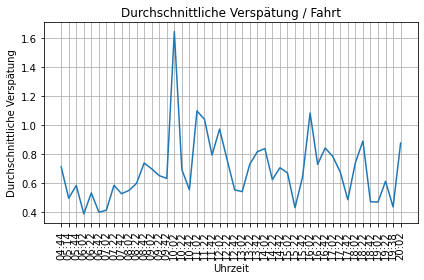

In [4]:
#Delay nach Uhrzeit angewandt auf Rohdaten
delayMeans = []
for time in range(len(startTimes)):
    Delay = []
    selectedData = data[data["RideID"] == time]
    
    for column in list(selectedData):
        if ("Delay" in column):
            Delay.append(selectedData[column].mean())
            
    delayMeans.append((sum(Delay) / len(Delay)))
    
plt.plot(startTimes, delayMeans)        
plt.grid()
plt.xticks(rotation = "vertical")
plt.xlabel("Uhrzeit")
plt.ylabel("Durchschnittliche Verspätung")
plt.title("Durchschnittliche Verspätung / Fahrt")
plt.tight_layout()

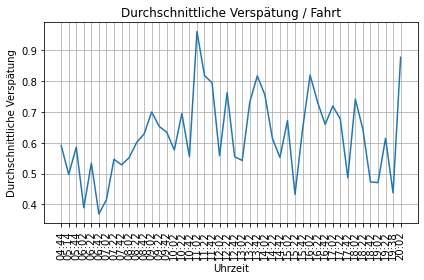

In [5]:
#Delay nach Uhrzeit angewandt auf Daten ohne Ausreißer
delayMeansClean = []
for time in range(len(startTimes)):
    Delay = []
    selectedData = data[data["RideID"] == time]
    
    for column in list(selectedData):
        if ("Delay" in column):
            selectedData = selectedData[selectedData[column] < 10]
            Delay.append(selectedData[column].mean())
            
    delayMeansClean.append((sum(Delay) / len(Delay)))
    
plt.plot(startTimes, delayMeansClean)        
plt.grid()
plt.xticks(rotation = "vertical")
plt.xlabel("Uhrzeit")
plt.ylabel("Durchschnittliche Verspätung")
plt.title("Durchschnittliche Verspätung / Fahrt")
plt.tight_layout()

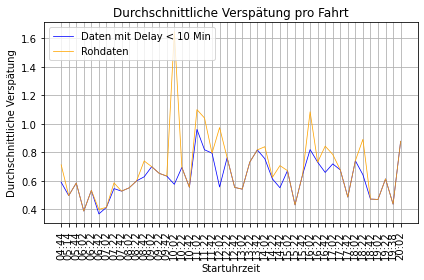

In [6]:
#Vergleich zwischen bereinigten und Rohdaten
plt.plot(startTimes, delayMeansClean, color = "blue", label = "Daten mit Delay < 10 Min", linewidth = 0.75)
plt.plot(startTimes, delayMeans, color = "orange", label = "Rohdaten", linewidth = 0.75)
plt.legend(loc = "upper left")
plt.xticks(rotation = "vertical")
plt.grid()
plt.xlabel("Startuhrzeit")
plt.ylabel("Durchschnittliche Verspätung")
plt.title("Durchschnittliche Verspätung pro Fahrt")
plt.tight_layout()
# plt.savefig("Durchschnittliche Verspätung pro Fahrt", dpi = 200)

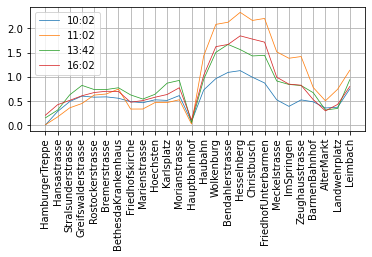

In [15]:
#Fahrzeiten mit besonders hoher Verspätung werden genauer betrachtet
#Es werden nur Delay < 10 Min berücksichtigt! 
highDelayTimes = ["10:02", "11:02", "13:42", "16:02"]
for time in highDelayTimes:
    Haltestelle = []
    Delay = []
    selectedData = data[data["TimeHamburgerTreppe"] == time]
    for column in list(selectedData):
        if ("Delay" in column):
            selectedData = selectedData[selectedData[column] < 10]
            Haltestelle.append(column.replace("Delay", ""))
            Delay.append(selectedData[column].mean())
            
    plt.plot(Haltestelle, Delay, label = str(time), linewidth = 0.75)
    plt.legend(loc = "upper left")
    plt.xticks(rotation = "vertical")
plt.grid()
plt.gcf().subplots_adjust(bottom= 0.45)
# plt.savefig("Durchschnittliche Verspätung der spätesten Haltestellen", dpi = 200)